# Project: Investigate a Dataset (No_Show Appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I chose the "No-show appointments" dataset for my "Investigate a dataset" project
>
> This dataset is about 110,527 medical appointments its 14 associated variables which are
>
> PatientId: Identification of a patient
>
> AppointmentID: Identification of each appointment
>
> Gender: Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.
>
> ScheduledDay: The day of the actuall appointment, when they have to visit the doctor.
>
> AppointmentDay: The day someone called or registered the appointment, this is before appointment of course.
>
> Age: How old is the patient.
>
> Neighbourhood: Where the appointment takes place.
>
> Scholarship: If patient is enrolled in Brasilian welfare program Bolsa Família or not.
>
> Hipertension: True or False
>
> Diabetes: True or False
>
> Alcoholism: True or False
>
> Handcap: True or False
>
> SMS_received: 1 or more messages sent to the patient.
>
> No-show: 'No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

>  In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

Read the file

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Size of the dataset

In [3]:
df.shape

(110527, 14)

In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
#check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Check for duplicated values

In [6]:
df.duplicated().sum()

0

Check for missing values

In [7]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

### Data Cleaning 

> Drop columns that are not necessary 
> 
> Change column names
>
> Deleting the age that is wrong

Drop columns that are not needed

In [8]:
df.drop(['PatientId', 'AppointmentID'], axis = 1, inplace = True)

In [9]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Rename columns

In [10]:
df.rename(columns = {"No-show": "Showed", "Handcap": "Handicap", "Hipertension": "Hypertension"}, inplace = True)

Confirm column names have been changed

In [11]:
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Showed
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


Remove the negative age

In [12]:
min_age = df[df['Age'] == -1].index
df.drop(min_age, inplace = True)

Confirm the negative age has been removed

In [13]:
df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


 Change the values in Showed column to zeros and ones

In [14]:
df['Showed'] = df['Showed'].apply(lambda x: 1 if x == 'No' else 0)

Confirm changes

In [15]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Showed
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1


<a id='eda'></a>
## Exploratory Data Analysis

>  Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Question 1: Which gender missed their appointment most

In [16]:
df.groupby('Gender').Showed.value_counts()

Gender  Showed
F       1         57245
        0         14594
M       1         30962
        0          7725
Name: Showed, dtype: int64

In [17]:
showed = df.Showed == True
no_show = df.Showed == False

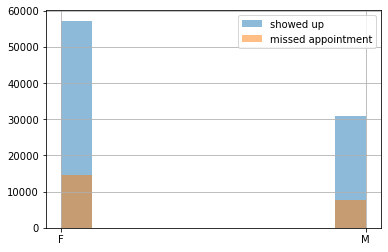

In [18]:
df.Gender[showed].hist(alpha = 0.5, label = 'showed up')
df.Gender[no_show].hist(alpha = 0.5, label = 'missed appointment');
plt.legend(['showed up', 'missed appointment']);

The above histogram shows that more females showed up than males and more females did not show than the males

### Question 2: Did more people show up for their appointment

In [19]:
v = df["Showed"].value_counts()
v

1    88207
0    22319
Name: Showed, dtype: int64

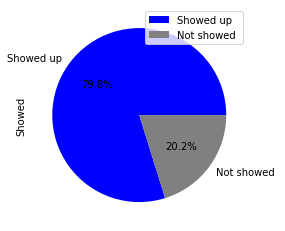

In [20]:
v.plot(kind = 'pie', colors = ['blue', 'grey'], labels = ['Showed up', 'Not showed '], autopct = '%1.1f%%')
plt.legend();

The above pie chart shows that almost 80% of the people showed up

### Question 3: Which ailment had the highest schedule for appointment

Find the mean of the ailments

In [21]:
hipertension_mean = df.Hypertension.mean() * 100
diabetes_mean = df.Diabetes.mean() * 100
alcoholism_mean = df.Alcoholism.mean() * 100
handcap_mean = df.Handicap.mean() * 100

In [22]:
def plot_bar(x,y):
    colors = ['black', 'green', 'gray', 'yellow']
    locations = [1, 2, 3, 4]
    heights = [hipertension_mean, diabetes_mean, alcoholism_mean, handcap_mean]
    labels = ['Hypertension', 'Diabetes', 'Alcoholism', 'Handicap']

    plt.bar(locations,heights,color=colors, alpha=0.7);
    plt.title('Ailment rate')
    plt.xlabel('Ailment', fontsize=18)
    plt.ylabel('Rate', fontsize=18)
    plt.xticks(locations, labels);


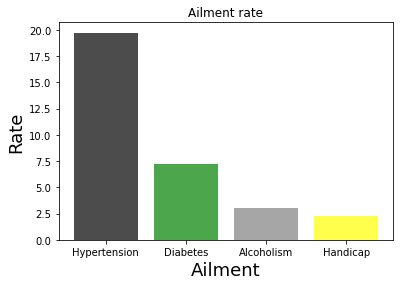

In [23]:
x = ['Hypertension', 'Diabetes', 'Alcoholism', 'Handicap']
y = [hipertension_mean, diabetes_mean, alcoholism_mean, handcap_mean]
plot_bar(x,y)

The above bar chart shows that people had hypertension the most

### Question 4: Does SMS affect the rate at which people showed up

In [24]:
df.groupby('SMS_received') ['Showed'].count()

SMS_received
0    75044
1    35482
Name: Showed, dtype: int64

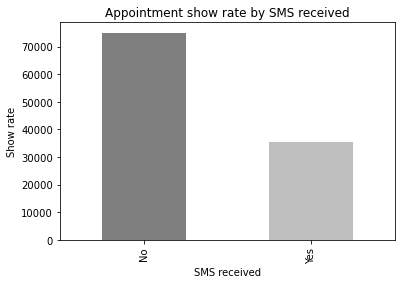

In [25]:
df.groupby('SMS_received')['Showed'].count().plot(kind='bar', alpha=0.5, color=['black', 'gray']);

# title and labels
plt.xticks([0, 1], ['No', 'Yes'])
plt.title('Appointment show rate by SMS received');
plt.xlabel('SMS received')
plt.ylabel('Show rate');

The above chart shows that people that did not get SMS showed up more

### Question 5: Which gender is most affected by ailments

In [26]:
df.groupby('Gender')['Hypertension'].mean()

Gender
F    0.213519
M    0.167033
Name: Hypertension, dtype: float64

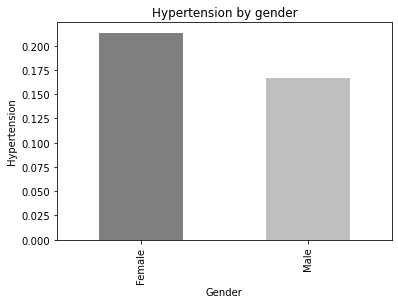

In [27]:
df.groupby('Gender')['Hypertension'].mean().plot(kind='bar', alpha=0.5, color=['black', 'gray']);

plt.xticks([0, 1], ['Female', 'Male'])
plt.title('Hypertension by gender');
plt.xlabel('Gender');
plt.ylabel('Hypertension');

This shows that hypertension is more in females than males

In [28]:
df.groupby('Gender')['Diabetes'].mean()

Gender
F    0.078036
M    0.060408
Name: Diabetes, dtype: float64

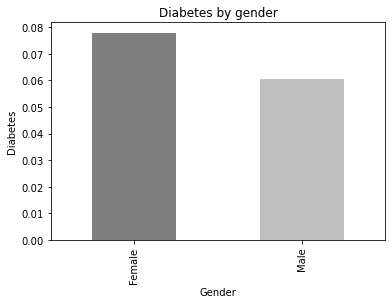

In [29]:
df.groupby('Gender')['Diabetes'].mean().plot(kind='bar', alpha=0.5, color=['black', 'gray']);

plt.xticks([0, 1], ['Female', 'Male'])
plt.title('Diabetes by gender');
plt.xlabel('Gender');
plt.ylabel('Diabetes');

This shows that Diabetes is more in females than males

In [30]:
df.groupby('Gender')['Alcoholism'].mean()

Gender
F    0.017024
M    0.055238
Name: Alcoholism, dtype: float64

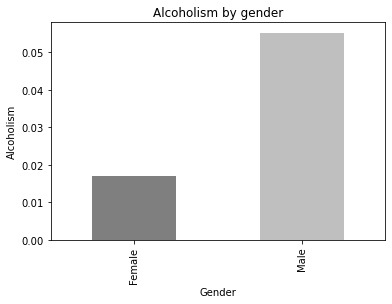

In [31]:
df.groupby('Gender')['Alcoholism'].mean().plot(kind='bar', alpha=0.5, color=['black', 'gray']);

plt.xticks([0, 1], ['Female', 'Male'])
plt.title('Alcoholism by gender');
plt.xlabel('Gender');
plt.ylabel('Alcoholism');

This shows that Alcoholism is more in males tha females

In [32]:
df.groupby('Gender')['Handicap'].mean()

Gender
F    0.019544
M    0.027270
Name: Handicap, dtype: float64

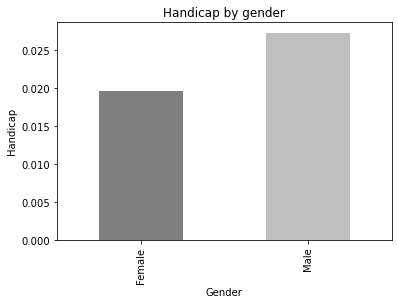

In [33]:
df.groupby('Gender')['Handicap'].mean().plot(kind='bar', alpha=0.5, color=['black', 'gray']);

plt.xticks([0, 1], ['Female', 'Male'])
plt.title('Handicap by gender');
plt.xlabel('Gender');
plt.ylabel('Handicap');

This shows that handicap disability is more in males than females

### Question 6:  What is the ratio of gender to handicap

Count of each handicap and gender

In [34]:
handicap_count = df.groupby(['Gender', 'Handicap']).count()['Showed']
handicap_count

Gender  Handicap
F       0           70549
        1            1181
        2             105
        3               3
        4               1
M       0           37736
        1             861
        2              78
        3              10
        4               2
Name: Showed, dtype: int64

In [35]:
handicap_total = df.groupby('Gender').count()['Showed']
handicap_total

Gender
F    71839
M    38687
Name: Showed, dtype: int64

Find the ratio of the females and males

In [37]:
male_handicap_ratio = handicap_count['M'] / handicap_total['M']
male_handicap_ratio

Handicap
0    0.975418
1    0.022256
2    0.002016
3    0.000258
4    0.000052
Name: Showed, dtype: float64

In [38]:
female_handicap_ratio = handicap_count['F'] / handicap_total['F']
female_handicap_ratio

Handicap
0    0.982043
1    0.016440
2    0.001462
3    0.000042
4    0.000014
Name: Showed, dtype: float64

In [40]:
index = np.arange(len(male_handicap_ratio))
width = 0.3

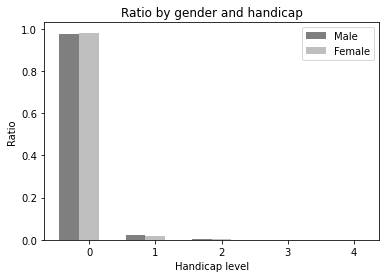

In [41]:
Male = plt.bar(index, male_handicap_ratio, width, alpha = 0.5, color = 'black', label = 'Male')
Female = plt.bar(index + width, female_handicap_ratio, width, alpha = 0.5, color = 'gray', label = 'Female')

plt.xlabel('Handicap level')
plt.ylabel('Ratio')
plt.title('Ratio by gender and handicap')
locations = index + width
labels = [0,1,2,3,4]
plt.xticks(locations,labels)
plt.legend();

<a id='conclusions'></a>
## Conclusions

> 1. More females showed up for their appointment than the males, 65% of females and 35% of males
>
> 2. 80% of the people attend their appointment
>
> 3. Hipertension is the most common ailment, 19% of the people had hypertension
>
> 4. People who did not receive SMS showed up for their appointment than those who didn't
>
> 5. Alcoholism and Handicap are higher in males than in females
>
> 6. Hypertension and Diabetes are higher in females than in males


## Limitations
> Some of the ages were negative